# Importing Data


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\97109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


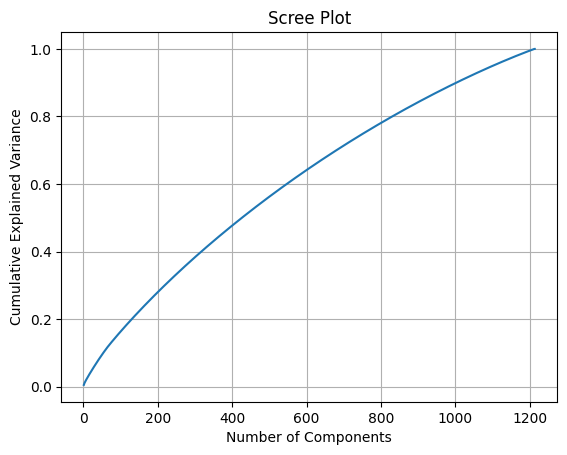

Optimal number of components: 1101
0.9503011705070163


In [ ]:
# importing the cvs file
df_train_MRI = pd.read_csv("TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")

# PCA MRI data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

 # Drop the id column
features = df_train_MRI.drop(columns=['participant_id'])

# Assuming 'features' is your data
pca = PCA()  # Initialize PCA without specifying n_components
pca.fit(features)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose the optimal number of components based on the plot
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Example: 95% variance
print(f"Optimal number of components: {optimal_n_components}")

# scale the data before applying pca
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components = 1103)
pca_components = pca.fit_transform(scaled_features)
df_train_MRI_PCA = pd.DataFrame(pca_components,  columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_train_MRI_PCA['participant_id'] = df_train_MRI['participant_id']
df_train_MRI_PCA.head()
print(pca.explained_variance_ratio_.sum())

In [ ]:
# Importing the excel file
df_train_categorical = pd.read_excel("TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx",engine ="openpyxl")
df_train_quantitative = pd.read_excel("TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx", engine = "openpyxl")
df_train_solution = pd.read_excel("TRAIN/TRAINING_SOLUTIONS.xlsx", engine = "openpyxl")

# Create dummy varaibles for categorical data
print(df_train_categorical.head())

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                   

In [ ]:
print(df_train_categorical.columns[df_train_categorical.columns.duplicated()])
print(df_train_quantitative.columns[df_train_quantitative.columns.duplicated()])
print(df_train_solution.columns[df_train_solution.columns.duplicated()])
print(df_train_MRI_PCA.columns[df_train_MRI_PCA.columns.duplicated()])

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [ ]:
# Merge these dataset together
df_train = pd.merge(df_train_categorical, df_train_quantitative, on="participant_id", how = "inner")
df_train = pd.merge(df_train,df_train_solution, on="participant_id", how = "inner")
df_train = pd.merge(df_train,df_train_MRI_PCA, on="participant_id", how = "inner")
print(df_train.head())
print(df_train.shape)

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                   

# Data Cleaning

## Clean Training Data

In [ ]:
# Data Cleaning I

%pip install scikit-learn
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

df_train_ADHD = df_train['ADHD_Outcome']
df_train_Sex = df_train['Sex_F']
df_id_columns = df_train['participant_id']

# Create the MICE imputer with Ridge as estimator
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=6,
    random_state=0
)

# Fit and transform the data
df_train = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
df_trian_imputed = imputer.fit_transform(df_train)


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\97109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# fit the processed data to the original data frame
df_train = pd.DataFrame(df_trian_imputed)
df_train.isnull().sum().sum()  

np.int64(0)

In [ ]:
# check by printing
df_train

,0,1,2,3,4,5,6,7,8,9,...,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129
0,2016.0,1.0,0.0,0.0,1.0,21.0,45.0,21.0,45.0,40.00,...,1.473341,-2.341636,0.401777,-1.147885,-0.991695,-0.433995,0.611614,-0.691968,-0.436498,0.265673
1,2019.0,3.0,1.0,2.0,3.0,15.0,15.0,0.0,0.0,-94.47,...,-3.454688,-6.579606,-3.524900,2.098919,-0.334596,-0.602407,8.234615,2.861807,-6.050851,-3.327359
2,2016.0,1.0,1.0,8.0,1.0,18.0,40.0,0.0,0.0,-46.67,...,-0.920799,0.032962,-1.306160,1.324572,-3.670966,1.504438,0.770388,-0.904208,1.443721,-1.095675
3,2018.0,3.0,0.0,8.0,3.0,15.0,30.0,18.0,0.0,-26.68,...,-3.001534,-5.914567,-3.590970,0.633950,-4.149145,0.154686,-1.164516,0.907957,-1.108788,-3.184772
4,2019.0,3.0,0.0,1.0,3.0,15.0,20.0,0.0,0.0,0.00,...,-0.431508,-0.840347,5.419392,2.279699,-0.286531,-0.221317,2.663301,0.881275,0.507105,-0.564102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2019.0,1.0,0.0,0.0,2.0,21.0,40.0,21.0,40.0,87.80,...,-1.293340,5.595252,-2.034721,-1.255543,-6.578336,-0.746704,-10.177119,-2.994451,-1.267481,1.931029
1209,2016.0,1.0,0.0,0.0,1.0,18.0,35.0,0.0,0.0,77.80,...,1.303742,0.291239,3.754742,-1.947391,1.959253,1.014473,0.462741,1.280653,-0.679987,0.578022
1210,2015.0,1.0,1.0,2.0,1.0,18.0,20.0,0.0,0.0,16.68,...,0.072180,-1.026959,1.340815,-1.632851,0.652821,-0.407793,0.094553,2.315050,-2.214784,0.035297
1211,2018.0,3.0,0.0,8.0,3.0,21.0,40.0,18.0,45.0,53.40,...,1.572205,-1.422749,7.128754,1.487079,-0.495843,-3.413832,-3.010522,-0.101779,2.014327,4.677283


In [ ]:
# Step 1: Collect the new column names from the index of each DataFrame
new_names_lists = [
    df_train_categorical.columns[1:].tolist(),
    df_train_quantitative.columns[1:].tolist(),
    df_train_MRI_PCA.columns[1:].tolist(),
]
# 合并为一维列表
new_names = [name for sublist in new_names_lists for name in sublist]

# df_train.columns =  new_names
df_train.rename(columns={df_train.columns[-1]: 'PC1104'}, inplace=True)
# df_train.insert(0, 'participant_id', df_id_columns.values)

# Step 2: Append df_train_Sex and df_train_ADHD at the end
df_train = pd.concat([df_train, df_train_Sex, df_train_ADHD], axis=1)

# Step 3: Check the result
df_train

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,PC1104,Sex_F,ADHD_Outcome
0,2016.0,1.0,0.0,0.0,1.0,21.0,45.0,21.0,45.0,40.00,...,0.401777,-1.147885,-0.991695,-0.433995,0.611614,-0.691968,-0.436498,0.265673,1,1
1,2019.0,3.0,1.0,2.0,3.0,15.0,15.0,0.0,0.0,-94.47,...,-3.524900,2.098919,-0.334596,-0.602407,8.234615,2.861807,-6.050851,-3.327359,0,1
2,2016.0,1.0,1.0,8.0,1.0,18.0,40.0,0.0,0.0,-46.67,...,-1.306160,1.324572,-3.670966,1.504438,0.770388,-0.904208,1.443721,-1.095675,0,1
3,2018.0,3.0,0.0,8.0,3.0,15.0,30.0,18.0,0.0,-26.68,...,-3.590970,0.633950,-4.149145,0.154686,-1.164516,0.907957,-1.108788,-3.184772,1,1
4,2019.0,3.0,0.0,1.0,3.0,15.0,20.0,0.0,0.0,0.00,...,5.419392,2.279699,-0.286531,-0.221317,2.663301,0.881275,0.507105,-0.564102,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2019.0,1.0,0.0,0.0,2.0,21.0,40.0,21.0,40.0,87.80,...,-2.034721,-1.255543,-6.578336,-0.746704,-10.177119,-2.994451,-1.267481,1.931029,0,0
1209,2016.0,1.0,0.0,0.0,1.0,18.0,35.0,0.0,0.0,77.80,...,3.754742,-1.947391,1.959253,1.014473,0.462741,1.280653,-0.679987,0.578022,1,0
1210,2015.0,1.0,1.0,2.0,1.0,18.0,20.0,0.0,0.0,16.68,...,1.340815,-1.632851,0.652821,-0.407793,0.094553,2.315050,-2.214784,0.035297,1,0
1211,2018.0,3.0,0.0,8.0,3.0,21.0,40.0,18.0,45.0,53.40,...,7.128754,1.487079,-0.495843,-3.413832,-3.010522,-0.101779,2.014327,4.677283,0,0


## Load and clean the testing data

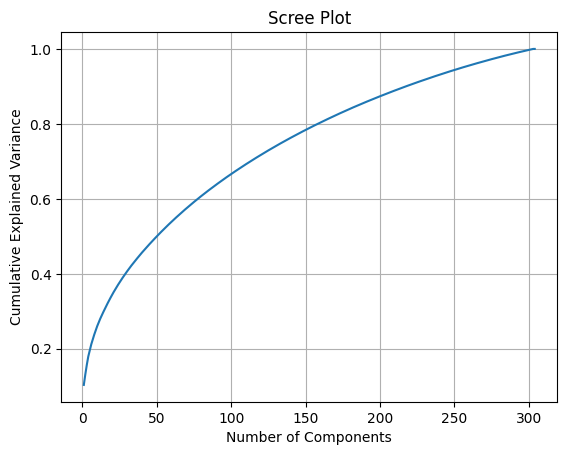

Optimal number of components: 256
0.9509568019799872


In [ ]:
# importing the cvs file
df_test_MRI = pd.read_csv("TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")

# PCA MRI data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

 # Drop the id column
features = df_test_MRI.drop(columns=['participant_id'])

# Assuming 'features' is your data
pca = PCA()  # Initialize PCA without specifying n_components
pca.fit(features)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose the optimal number of components based on the plot
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Example: 95% variance
print(f"Optimal number of components: {optimal_n_components}")

# scale the data before applying pca
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components = 257)
pca_components = pca.fit_transform(scaled_features)
df_test_MRI_PCA = pd.DataFrame(pca_components,  columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_test_MRI_PCA['participant_id'] = df_test_MRI['participant_id']
df_test_MRI_PCA.head()
print(pca.explained_variance_ratio_.sum())

In [ ]:
# Importing the excel file
df_test_categorical = pd.read_excel("TEST/TEST_CATEGORICAL.xlsx",engine ="openpyxl")
df_test_quantitative = pd.read_excel("TEST/TEST_QUANTITATIVE_METADATA.xlsx", engine = "openpyxl")
df_test_categorical
df_test_quantitative

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,86.71,14.0,3.0,17.0,41.0,17.0,11.0,25.0,1.0,18.0,7.0,7.0,5.0,6.0,11.0,4.0,7.0,7.546999
300,IUEHiLmQAqCi,73.37,14.0,5.0,12.0,38.0,22.0,9.0,29.0,2.0,16.0,2.0,11.0,5.0,9.0,5.0,3.0,8.0,10.531143
301,cRySmCadYFRO,87.84,13.0,3.0,14.0,42.0,15.0,10.0,28.0,1.0,11.0,4.0,4.0,4.0,3.0,7.0,3.0,10.0,7.210586
302,E3MvDUtJadc5,46.76,14.0,3.0,16.0,43.0,18.0,12.0,22.0,5.0,21.0,2.0,10.0,6.0,5.0,11.0,9.0,0.0,12.212183


In [ ]:
# merge testing data
df_test = pd.merge(df_test_categorical, df_test_quantitative, on="participant_id", how = "inner")
df_test = pd.merge(df_test,df_test_MRI_PCA, on="participant_id", how = "inner")
print(df_test.head())
print(df_test.shape)

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   Cfwaf5FX7jWK                     2022                       4   
1   vhGrzmvA3Hjq                     2023                       4   
2   ULliyEXjy4OV                     2022                       4   
3   LZfeAb1xMtql                     2022                       4   
4   EnFOUv0YK1RG                     2022                       4   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               2.0                          0.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        4                    21.0                    30.0   
1                   

In [ ]:
# Data Cleaning I

from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

df_id_columns = df_test['participant_id'] 
df_test = df_test.drop(columns=['participant_id'])

# Create the MICE imputer with Ridge as estimator
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0
)

# Fit and transform the data
df_test_imputed = imputer.fit_transform(df_test)
df_test = pd.DataFrame(df_test_imputed)
df_test

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,2022.0,4.0,0.0,0.0,4.0,21.0,30.0,18.000000,30.000000,60.03,...,-0.030626,-1.159142,0.476914,-5.964898,-6.892647,-6.784510,-2.713655,-9.194100,-1.445846,-1.068358
1,2023.0,4.0,0.0,0.0,4.0,21.0,45.0,19.403915,30.000000,86.71,...,6.683208,2.546204,-1.381019,2.386163,1.909620,-8.399154,-7.155964,2.045623,5.110945,-3.376604
2,2022.0,4.0,0.0,0.0,4.0,21.0,40.0,18.000000,40.000000,26.68,...,-3.280525,6.460293,6.719168,-0.737383,10.968130,9.081240,-3.095908,-7.281706,-5.438586,1.949339
3,2022.0,4.0,0.0,0.0,3.0,21.0,45.0,21.000000,45.000000,93.38,...,-1.696151,6.415094,0.380986,-1.549551,3.882000,0.523216,1.698630,12.882653,-1.164903,-7.746990
4,2022.0,4.0,2.0,0.0,4.0,18.0,0.0,21.000000,45.000000,-93.38,...,-8.419017,-1.557212,0.467490,-3.060199,-8.283883,-9.321567,-2.567455,-2.404437,-4.236204,-4.243532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2023.0,4.0,0.0,0.0,4.0,18.0,0.0,18.000000,35.000000,86.71,...,2.413198,-1.209328,-5.629288,-6.303677,-2.318869,0.311498,1.248317,-6.549014,6.478424,-0.899464
300,2023.0,4.0,0.0,1.0,3.0,18.0,35.0,21.000000,40.000000,73.37,...,-2.984036,1.810603,2.111648,2.704836,-5.245461,4.774495,5.307628,-2.159937,4.816469,-4.063984
301,2023.0,4.0,0.0,8.0,4.0,21.0,25.0,15.000000,35.723562,87.84,...,-5.464858,0.037839,-4.001374,-6.811803,-1.401957,-7.909423,-7.163593,7.635218,0.325902,4.769995
302,2022.0,4.0,0.0,8.0,4.0,21.0,0.0,21.000000,45.000000,46.76,...,5.652792,3.199470,2.048558,9.623575,-3.621547,-1.565347,-0.801052,-6.550583,-2.876284,5.157669


In [ ]:
df_test.isnull().sum().sum()

np.int64(0)

In [ ]:
# Step 1: Collect the new column names from the index of each DataFrame
new_names_lists = [
    df_test_categorical.columns[1:].tolist(),
    df_test_quantitative.columns[1:].tolist(),
    df_test_MRI_PCA.columns[1:].tolist(),
]
new_names = [name for sublist in new_names_lists for name in sublist]

# Step 2: Construct the full new column list
# Assuming the first column is a placeholder and will be replaced later with participant_id
df_test.columns = new_names

# Optional renaming of the last column
df_test.rename(columns={df_test.columns[-1]: 'PC257'}, inplace=True)

# Step 3: Replace the placeholder with actual participant IDs
df_test.insert(0, 'participant_id', df_id_columns.values)

# Step 4: Check the result
df_test.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,PC249,PC250,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC257
0,Cfwaf5FX7jWK,2022.0,4.0,0.0,0.0,4.0,21.0,30.0,18.000000,30.0,...,-0.030626,-1.159142,0.476914,-5.964898,-6.892647,-6.784510,-2.713655,-9.194100,-1.445846,-1.068358
1,vhGrzmvA3Hjq,2023.0,4.0,0.0,0.0,4.0,21.0,45.0,19.403915,30.0,...,6.683208,2.546204,-1.381019,2.386163,1.909620,-8.399154,-7.155964,2.045623,5.110945,-3.376604
2,ULliyEXjy4OV,2022.0,4.0,0.0,0.0,4.0,21.0,40.0,18.000000,40.0,...,-3.280525,6.460293,6.719168,-0.737383,10.968130,9.081240,-3.095908,-7.281706,-5.438586,1.949339
3,LZfeAb1xMtql,2022.0,4.0,0.0,0.0,3.0,21.0,45.0,21.000000,45.0,...,-1.696151,6.415094,0.380986,-1.549551,3.882000,0.523216,1.698630,12.882653,-1.164903,-7.746990
4,EnFOUv0YK1RG,2022.0,4.0,2.0,0.0,4.0,18.0,0.0,21.000000,45.0,...,-8.419017,-1.557212,0.467490,-3.060199,-8.283883,-9.321567,-2.567455,-2.404437,-4.236204,-4.243532


# Evaluate models

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume df is your full dataset loaded from the notebook, with all columns
# Remove identifier and target columns from features
X = df_train.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
y_sex = df_train['Sex_F']
y_adhd = df_train['ADHD_Outcome']

# Split into train and test (example: 80/20 split)
X_train, X_test, y_sex_train, y_sex_test, y_adhd_train, y_adhd_test = train_test_split(
    X, y_sex, y_adhd, test_size=0.2, random_state=42
)

# Train random forest for Sex_F
rf_sex = RandomForestClassifier(random_state=42)
rf_sex.fit(X_train, y_sex_train)

# Train random forest for ADHD_Outcome
rf_adhd = RandomForestClassifier(random_state=42)
rf_adhd.fit(X_train, y_adhd_train)

# Predict on test data
sex_pred = rf_sex.predict(X_test)
adhd_pred = rf_adhd.predict(X_test)


NameError: name 'df_train' is not defined